<a href="https://colab.research.google.com/github/rhsrex/STATISTICS/blob/main/pima_classification_baseline_03_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [16]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [17]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습과 예측에 사용할 데이터셋 만들기

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.shape

(768, 6)

In [20]:
y = df['Outcome']
y.shape

(768,)

In [21]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 6), (614,))

In [23]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 6), (154,))

## 머신러닝 알고리즘 사용하기

In [ ]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### 최적의 max_depth 값 찾기

In [ ]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [33]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [34]:
clf.best_params_

{'max_depth': 3, 'max_features': 0.7}

In [35]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=0.7, random_state=42)

In [36]:
clf.best_score_

np.float64(0.7606424097027855)

In [37]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.006593,0.001101,0.003786,0.000543,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
3,0.008554,0.002896,0.003779,0.000784,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.699187,0.804878,0.764228,0.731707,0.795082,0.759016,0.039387,2
1,0.007891,0.001669,0.003551,0.000609,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.699187,0.813008,0.764228,0.731707,0.778689,0.757364,0.039092,3
8,0.007692,0.003551,0.003028,0.000303,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.731707,0.804878,0.747967,0.723577,0.778689,0.757364,0.030333,3
13,0.005982,0.000266,0.002928,0.000226,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.723577,0.772358,0.780488,0.723577,0.754098,0.750820,0.023829,5


In [38]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [39]:
clf.score(X_test, y_test)

0.7597402597402597

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [40]:
model

DecisionTreeClassifier(random_state=42)

In [41]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 8, 12, 13,  5,  3, 19, 17,  5,  9,  8])

In [42]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [43]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 8, 12, 13,  5,  3, 19, 17,  5,  9,  8]),
 'max_features': array([0.81382174, 0.95732361, 0.75868481, 0.91646334, 0.78169443,
        0.86083535, 0.79521166, 0.84672655, 0.81700297, 0.8295623 ,
        0.79907091, 0.98003362, 0.7857287 , 0.95143109, 0.9342059 ,
        0.72661744, 0.88080722, 0.80858968, 0.79594289, 0.98143352,
        0.70786113, 0.82185082, 0.88879744, 0.9473865 , 0.85736228,
        0.96521479, 0.81681661, 0.83528488, 0.96397738, 0.90075186,
        0.94303183, 0.81314778, 0.81692792, 0.73153816, 0.86244541,
        0.74956083, 0.9645921 , 0.80393127, 0.73972558, 0.71653093,
        0.85008097, 0.88305598, 0.7338867 , 0.74475854, 0.85212841,
        0.7108392 , 0.9904564 , 0.70102029, 0.79580518, 0.82568339,
        0.99862469, 0.9699962 , 0.75270079, 0.86041326, 0.89184322,
        0.77252254, 0.81748355, 0.92795098, 0.89991399, 0.99885632,
        0.85424304, 0.88724287, 0.89661022, 0.83386794, 0.98198658,
        0.92939052, 0.91219162, 0.780

In [44]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 12, 13,  5,  3, 19, 17,  5,  9,  8]),
                                        'max_features': array([0.81382174, 0.95732361, 0.75868481, 0.91646334, 0.78169443,
       0.86083535, 0.79521166, 0.84672655, 0.81700297, 0.8295623 ,
       0.79907091, 0.98003362, 0.7857287 , 0.95143109, 0.9342059 ,
       0.72...
       0.81476412, 0.83737441, 0.755726  , 0.83651581, 0.94725557,
       0.90804963, 0.88439402, 0.82851886, 0.76487177, 0.77012186,
       0.87334286, 0.8470953 , 0.75201474, 0.74392759, 0.86226059,
       0.79105721, 0.94312728, 0.95299987, 0.79857359, 0.83843444,
       0.76519976, 0.72707205, 0.82589381, 0.91147025, 0.99931306,
       0.96759756, 0.92287039, 0.79197496, 0.79663629, 0.71048062]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [45]:
clf.best_params_

{'min_samples_split': 5,
 'max_features': np.float64(0.7520147358087028),
 'max_depth': np.int64(3)}

In [46]:
clf.best_score_

np.float64(0.7606424097027855)

In [47]:
clf.score(X_test, y_test)

0.7597402597402597

In [48]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.008810,0.002407,0.005239,0.001489,6,0.825894,3,"{'min_samples_split': 6, 'max_features': 0.825...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
968,0.004706,0.000217,0.003030,0.000081,3,0.758685,3,"{'min_samples_split': 3, 'max_features': 0.758...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
297,0.004902,0.000174,0.003057,0.000088,2,0.710839,3,"{'min_samples_split': 2, 'max_features': 0.710...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
781,0.005233,0.001007,0.003046,0.000082,2,0.795805,3,"{'min_samples_split': 2, 'max_features': 0.795...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1
293,0.006472,0.002689,0.004566,0.001872,2,0.716531,3,"{'min_samples_split': 2, 'max_features': 0.716...",0.699187,0.804878,0.764228,0.739837,0.795082,0.760642,0.038381,1


## 학습과 예측하기

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model

DecisionTreeClassifier(max_depth=3, random_state=42)

In [32]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 75.97402597402598
4 69.48051948051948
5 79.22077922077922
6 74.02597402597402
7 74.02597402597402
8 74.02597402597402
9 69.48051948051948
10 74.67532467532467
11 74.02597402597402


In [25]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
feature_names = X_train.columns.tolist()

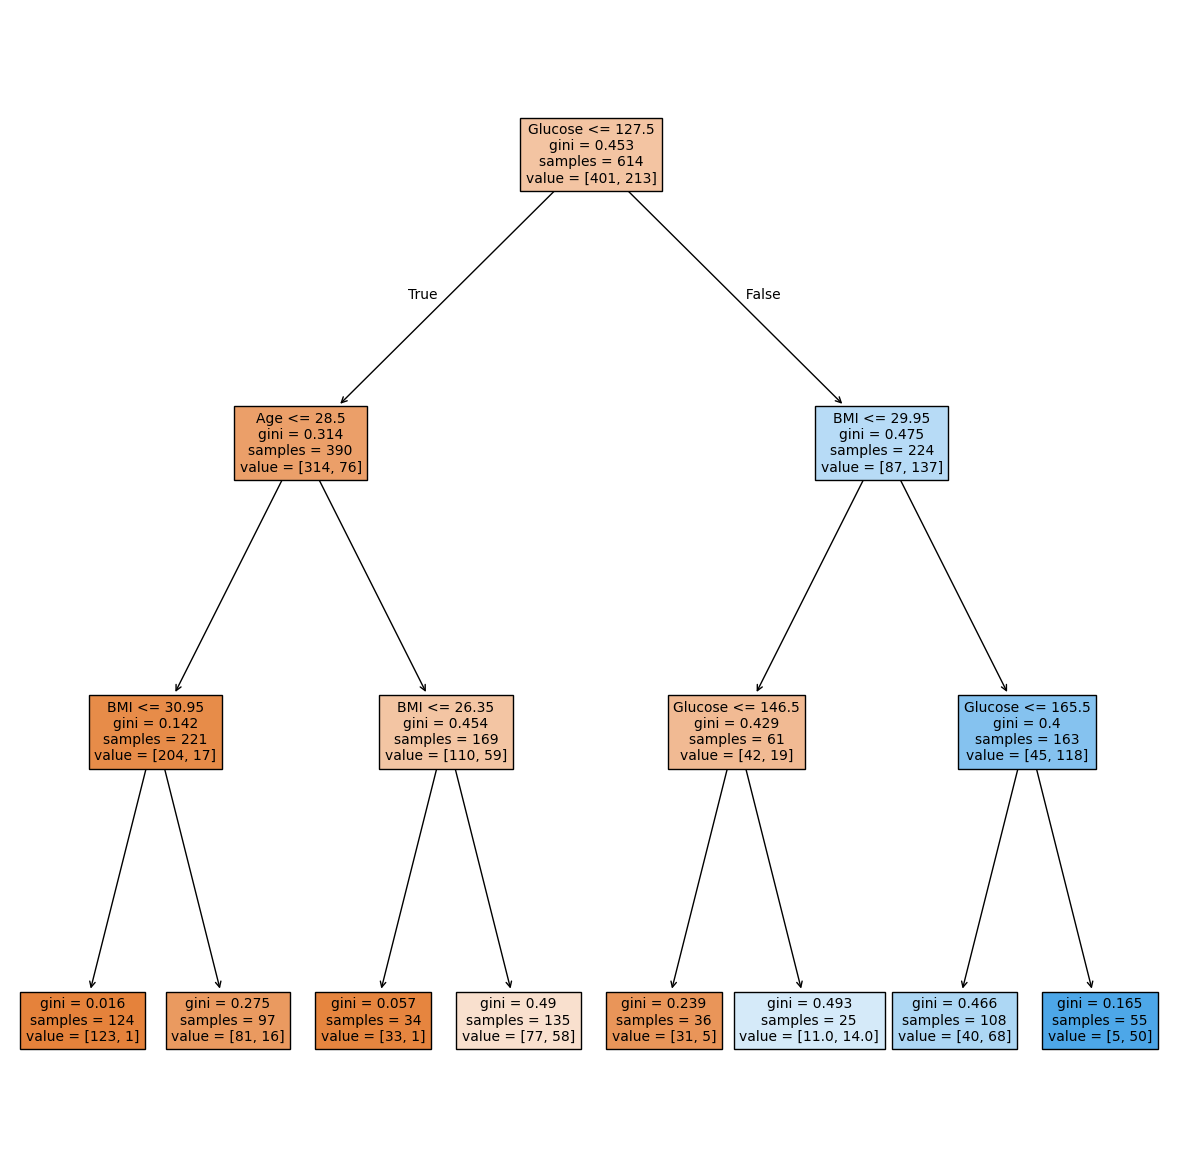

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [28]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [29]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

np.int64(37)

In [31]:
# accuracy score를 구합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

75.97402597402598